<a href="https://colab.research.google.com/github/badriadhikari/2019-Spring-DL/blob/master/course_content/module4_dl_best_practices/When_training_loss_decreases_and_then_increases.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## When_training_loss_decreases_and_then_increases - MNIST Digit Classification with adam & rmsprop

Using TensorFlow backend.



Dataset dimensions..
(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)

A sample..


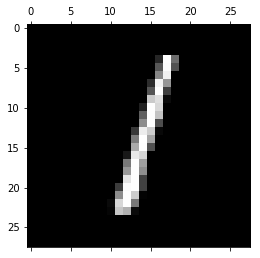

1

Preprocess..

Convert labels to categorical..
(60000, 10)
(10000, 10)

Build model..
Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 24, 24, 16)        416       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 20, 20, 16)        6416      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 16)        6416      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 16)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 16)         

In [1]:
from keras.datasets import mnist
from keras.utils import to_categorical
from keras.layers import *
from keras.models import *
import matplotlib.pyplot as plt

( train_images, train_labels ), ( valid_images, valid_labels ) = mnist.load_data()

print('')
print('Dataset dimensions..')
print(train_images.shape)
print(train_labels.shape)
print(valid_images.shape)
print(valid_labels.shape)

print('')
print('A sample..')
plt.matshow( valid_images[2], cmap = 'gray')
plt.show()
print(valid_labels[2])

print('')
print('Preprocess..')
train_images = train_images.reshape( ( 60000, 28, 28, 1 ) )
train_images = train_images.astype( 'float32' ) / 255
valid_images = valid_images.reshape( ( 10000, 28, 28, 1 ) )
valid_images = valid_images.astype( 'float32' ) / 255

print('')
print('Convert labels to categorical..')
train_labels = to_categorical( train_labels )
valid_labels = to_categorical( valid_labels )

print( train_labels.shape )
print( valid_labels.shape )

print('')
print('Build model..')
model = Sequential()
model.add(Conv2D(filters = 16, kernel_size = 5, activation = 'relu', input_shape = (28,28,1)))
model.add(Conv2D(filters = 16, kernel_size = 5, activation = 'relu'))
model.add(Conv2D(filters = 16, kernel_size = 5, activation = 'relu'))
model.add(MaxPooling2D(pool_size = 2, strides = 2))
model.add(Flatten())
model.add(Dense(units = 16, activation = 'relu'))
model.add(Dense(units = 10, activation = 'softmax'))

model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

print(model.summary())

history = model.fit( train_images, train_labels, verbose = 1, epochs = 128, batch_size = 10, validation_data = (valid_images, valid_labels) )

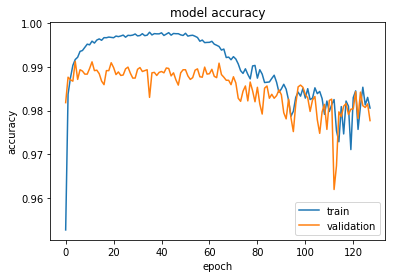

In [2]:
import matplotlib.pyplot as plt
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='lower right')
plt.show()

In [9]:
model.compile(optimizer = 'rmsprop', loss = 'categorical_crossentropy', metrics = ['accuracy'])
history = model.fit( train_images, train_labels, verbose = 1, epochs = 128, batch_size = 10, validation_data = (valid_images, valid_labels) )

Train on 60000 samples, validate on 10000 samples
Epoch 1/128
60000/60000 [==============================] - 26s 429us/step - loss: 0.2598 - acc: 0.9838 - val_loss: 0.2783 - val_acc: 0.9827
Epoch 2/128
60000/60000 [==============================] - 24s 400us/step - loss: 0.2160 - acc: 0.9865 - val_loss: 0.2404 - val_acc: 0.9850
Epoch 3/128
60000/60000 [==============================] - 24s 403us/step - loss: 0.2006 - acc: 0.9875 - val_loss: 0.2385 - val_acc: 0.9852
Epoch 4/128
60000/60000 [==============================] - 25s 411us/step - loss: 0.1968 - acc: 0.9878 - val_loss: 0.2347 - val_acc: 0.9853
Epoch 5/128
60000/60000 [==============================] - 25s 413us/step - loss: 0.1899 - acc: 0.9882 - val_loss: 0.2418 - val_acc: 0.9850
Epoch 6/128
60000/60000 [==============================] - 26s 426us/step - loss: 0.1789 - acc: 0.9889 - val_loss: 0.2468 - val_acc: 0.9846
Epoch 7/128
60000/60000 [==============================] - 26s 436us/step - loss: 0.1768 - acc: 0.9890 - val_l

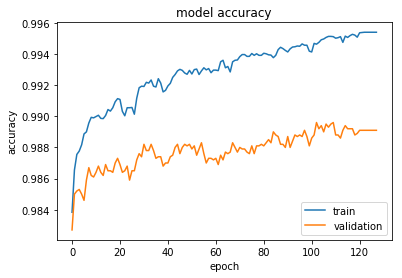

In [10]:
import matplotlib.pyplot as plt
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='lower right')
plt.show()